In [1]:
# Transfer learning is a deep learning tecnique where we use a pre-trained model.
# this pre-trained model is trained foe one task can be re-trained foe a similar task with a smaller dataset.

# --> Transfer Learning gives higher accuracy compared to training models from scratch.

# Examples of transfer learning models
'''
1. VGG16
2. ResNet50
3. InceptionV3
4. MobileNetV2
'''

In [2]:
!pip install kaggle

In [3]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing Dog vs Cat Dataset from kaggle

In [7]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:14<00:00, 55.0MB/s]
100% 812M/812M [00:14<00:00, 60.2MB/s]


In [8]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
import os

# counting the number of files in train folder

path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of Images: ",file_count)

Number of Images:  25000


### Printing The Name of Images

In [12]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.12445.jpg', 'cat.12264.jpg', 'dog.5220.jpg', 'cat.570.jpg', 'dog.5271.jpg', 'dog.10542.jpg', 'dog.727.jpg', 'dog.3786.jpg', 'dog.5408.jpg', 'cat.6256.jpg', 'cat.3276.jpg', 'cat.11079.jpg', 'dog.1170.jpg', 'dog.3647.jpg', 'dog.7757.jpg', 'cat.9336.jpg', 'dog.1824.jpg', 'cat.1462.jpg', 'dog.2083.jpg', 'dog.6365.jpg', 'dog.7104.jpg', 'dog.3836.jpg', 'cat.409.jpg', 'cat.3219.jpg', 'dog.12006.jpg', 'dog.1835.jpg', 'cat.1977.jpg', 'dog.11198.jpg', 'cat.12084.jpg', 'cat.8920.jpg', 'dog.5211.jpg', 'cat.7169.jpg', 'dog.563.jpg', 'cat.5924.jpg', 'cat.1102.jpg', 'cat.4189.jpg', 'dog.7035.jpg', 'cat.2467.jpg', 'cat.5726.jpg', 'cat.9513.jpg', 'cat.7908.jpg', 'cat.11669.jpg', 'dog.490.jpg', 'cat.8975.jpg', 'dog.7839.jpg', 'dog.6528.jpg', 'dog.6948.jpg', 'dog.9281.jpg', 'dog.628.jpg', 'dog.321.jpg', 'cat.9571.jpg', 'cat.4854.jpg', 'dog.6469.jpg', 'cat.166.jpg', 'cat.10679.jpg', 'cat.5326.jpg', 'cat.9283.jpg', 'cat.480.jpg', 'cat.4206.jpg', 'cat.3418.jpg', 'dog.973.jpg', 'cat.4257.jpg', 'cat.478

## Importing Dependencies

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow           # cv2 is not working in colab,that is why we are using this

## Displaying The Images

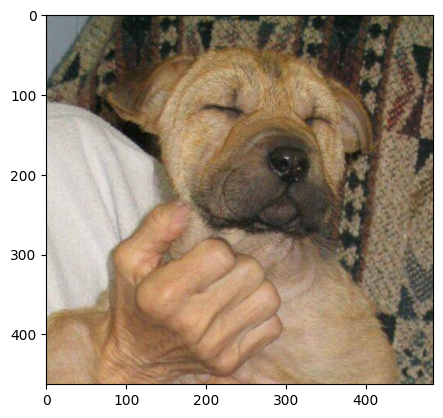

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.10542.jpg')
img_plot = plt.imshow(img)
plt.show()

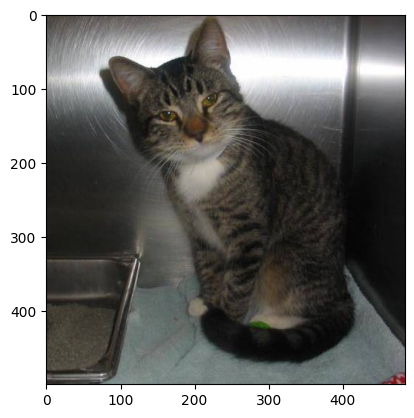

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.1131.jpg')
img_plot = plt.imshow(img)
plt.show()

## Count of Dog and Cat Images

In [16]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
cat
dog


In [17]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Dog Count: ',dog_count)
print('Cat Count: ',cat_count)

Dog Count:  12500
Cat Count:  12500


## Resizing all the images

In [18]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [19]:
original_folder = '/content/train'
resized_folder = '/content/image resized'

for i in range(2000):
  filename = os.listdir(original_folder)
  img_path = os.path.join(original_folder,filename[i])
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_save = os.path.join(resized_folder,filename[i])
  img.save(new_save)

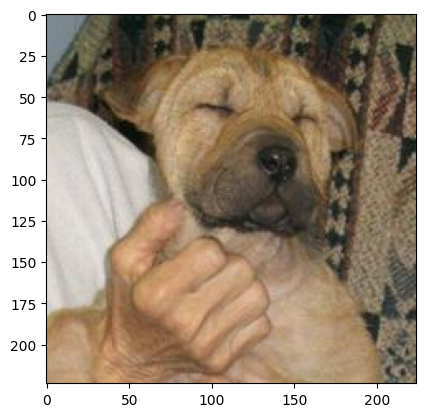

In [20]:
# display Resized dog image
img = mpimg.imread('/content/image resized/dog.10542.jpg')
img_plot = plt.imshow(img)
plt.show()

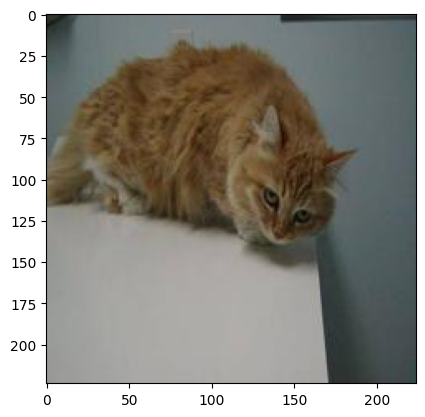

In [26]:
# display Resized cat image
img = mpimg.imread('/content/image resized/cat.7697.jpg')
img_plot = plt.imshow(img)
plt.show()

## Creating Labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [27]:
# Creating a for loop to assign labels

filenames = os.listdir('/content/image resized')

labels = []

for i in range(2000):
  filename = filenames[i]
  label = filename[0:3]

  if label == "dog":
    labels.append(1)
  else:
    labels.append(0)
print(labels[:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [28]:
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 978 1022]


## Converting all the resized images to numpy arrays

In [29]:
import cv2
import glob

In [33]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[  7  20  22]
   [  7  20  22]
   [  7  20  22]
   ...
   [112 108 107]
   [118 114 113]
   [114 110 109]]

  [[  5  17  17]
   [  4  18  17]
   [  6  18  18]
   ...
   [108 103 104]
   [110 105 106]
   [103  98  99]]

  [[  5  16  14]
   [  4  17  15]
   [  8  19  17]
   ...
   [ 98  91  98]
   [ 94  87  92]
   [ 83  76  81]]

  ...

  [[144 147 162]
   [146 149 164]
   [148 151 166]
   ...
   [181 195 218]
   [182 196 218]
   [184 198 220]]

  [[141 144 159]
   [142 145 160]
   [144 147 162]
   ...
   [181 195 217]
   [181 195 217]
   [181 195 217]]

  [[143 146 161]
   [143 146 161]
   [143 146 161]
   ...
   [180 194 216]
   [179 193 215]
   [179 193 215]]]


 [[[122 154 195]
   [108 140 181]
   [114 144 185]
   ...
   [193 191 221]
   [188 185 217]
   [188 185 217]]

  [[120 152 193]
   [107 139 180]
   [114 144 185]
   ...
   [190 188 218]
   [185 182 214]
   [185 182 214]]

  [[119 152 191]
   [106 139 178]
   [114 145 184]
   ...
   [187 185 215]
   [182 179 211]
   [182 179

In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_images
Y = np.asarray(labels)

## Train Test Split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


## Scaling the data

In [39]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building The Neural Network

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [42]:
num_of_classes = 2

model = tf.keras.Sequential([
                          pretrained_model,
                          tf.keras.layers.Dense(num_of_classes)

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [45]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.1930 - accuracy: 0.9181
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 0.0752 - accuracy: 0.9737
Epoch 3/5
50/50 [==============================] - 75s 2s/step - loss: 0.0554 - accuracy: 0.9794
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0443 - accuracy: 0.9875
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0359 - accuracy: 0.9919


In [46]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print("Test loss: ",loss)
print("Test Accuracy: ",accuracy)

13/13 [==============================] - 17s 1s/step - loss: 0.0386 - accuracy: 0.9850
Test loss:  0.03863329812884331
Test Accuracy:  0.9850000143051147


## **Predictive System**

Path of the image to be predicted: /content/Dog.jpeg


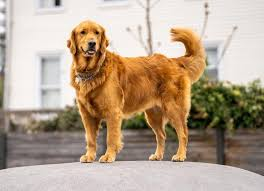

1/1 [==============================] - 0s 112ms/step
The image is a Dog


In [50]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

# print(input_prediction)

input_predit_label = np.argmax(input_prediction)

# print(input_predit_label)

if input_predit_label == 1:
  print("The image is a Dog")
else:
  print("The image is a Cat")